In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image_size = 28

train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",")

In [2]:
print("Number of training datapoints: {}".format(train_data.shape[0]))
print("Number of testing datapoints: {}".format(test_data.shape[0]))

Number of training datapoints: 60000
Number of testing datapoints: 10000


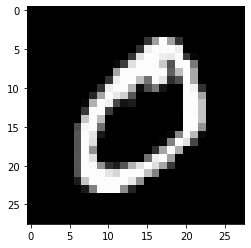

In [3]:
img = train_data[:, 1:][1].reshape((image_size, image_size))
plt.imshow(img, cmap="gray")
plt.show()

In [4]:
# Extracting the features and labels from the dataset and shortening the dataset to 10,000 datapoints
train_data_features = train_data[:10000, 1:]
train_data_labels = train_data[:10000, :1].reshape(10000,)

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Use SVD to bring down the dimension to 10
tsvd = TruncatedSVD(n_components=10)
X_SVD = tsvd.fit_transform(train_data_features)

# Further using t-SNE to bring the dimension down to 2
np.random.seed(0)
tsne = TSNE(n_components = 2)
train_data_features_reduced = tsne.fit_transform(X_SVD)

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
print("Dimension of the reduced dataset: {}".format(train_data_features_reduced.shape[1]))

Dimension of the reduced dataset: 2


In [7]:
## plot the train_data_features_reduced
import seaborn as sns
import pandas as pd

def plot2d(X, Y, c1, c2, N):
    lbl1 = f'Component {c1}'
    lbl2 = f'Component {c2}'
    df = pd.DataFrame({lbl1:X[:N,c1],lbl2:X[:N,c2], 'label':Y[:N]})
    sns.lmplot(data=df, x=lbl1, y=lbl2, fit_reg=False, hue='label', scatter_kws={'alpha':0.5})

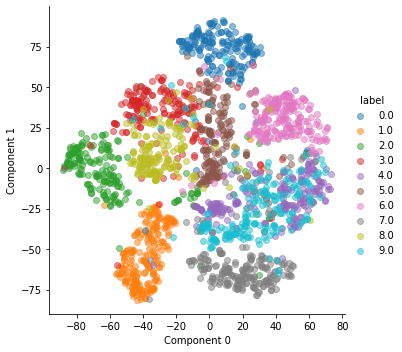

In [8]:
plot2d(train_data_features_reduced, train_data_labels, 0, 1, N=2000)

In [9]:
zero_datapoints = []
one_datapoints = []

for i in range(10000):
    if train_data_labels[i] == 0:
        zero_datapoints.append(train_data_features_reduced[i])
    if train_data_labels[i] == 1:
        one_datapoints.append(train_data_features_reduced[i])

zero_datapoints = np.array(zero_datapoints)
one_datapoints = np.array(one_datapoints)

print("no of zero datapoints", np.shape(zero_datapoints))
print("no of one datapoints", np.shape(one_datapoints))
        

no of zero datapoints (1001, 2)
no of one datapoints (1127, 2)


In [10]:
def normalize(arr, max_val, n):
    a = np.divide(arr, max_val)
    return a + n

zero_datapoints_normalized = normalize(zero_datapoints, 100, 1)
one_datapoints_normalized = normalize(one_datapoints, 100, 1)

In [26]:
from qiskit import *
import time
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.utils import QuantumInstance
from qiskit.aqua.algorithms import VQC

## ZFeatureMap

In [14]:
feature_dim = 3
Z_feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=4)
Z_feature_map.draw()


┌──────────────────────────────┐
q_0: ┤0                             ├
     │                              │
q_1: ┤1 ZFeatureMap(x[0],x[1],x[2]) ├
     │                              │
q_2: ┤2                             ├
     └──────────────────────────────┘

In [15]:
print("parameters of the Z Feature Map are: {}".format(Z_feature_map.parameters))

parameters of the Z Feature Map are: ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2])])


## ZZFeatureMap

In [16]:
feature_dim = 2
ZZ_feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, insert_barriers=True)
ZZ_feature_map.draw()

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):


┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [17]:
print("parameters of the Z Feature Map are: {}".format(ZZ_feature_map.parameters))

parameters of the Z Feature Map are: ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1])])


## PauliFeatureMap

In [18]:
feature_dim = 2
pauli_feature_map = PauliFeatureMap(feature_dimension=feature_dim, reps=1, paulis=['Z', 'X', 'ZY'])
pauli_feature_map.draw()

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):


┌─────────────────────────────┐
q_0: ┤0                            ├
     │  PauliFeatureMap(x[0],x[1]) │
q_1: ┤1                            ├
     └─────────────────────────────┘

## Building a Classifier
### Using Real Aplitudes

In [19]:
from qiskit.circuit.library import RealAmplitudes

num_qubits = 2

classifier_circ = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)
classifier_circ.draw()

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):


┌──────────────────────────────────────────────────────────┐
q_0: ┤0                                                         ├
     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]) │
q_1: ┤1                                                         ├
     └──────────────────────────────────────────────────────────┘

### Using Custom Variational Circuit

In [20]:
from qiskit.circuit import QuantumCircuit, ParameterVector

num_qubits = 3
reps = 1

x = ParameterVector('x', length=num_qubits)
custom_circ = QuantumCircuit(num_qubits)

for _ in range(reps):
    for i in range(num_qubits):
        custom_circ.rx(x[i], i)
    for i in range(num_qubits):
        for j in range(i+1, num_qubits):
            custom_circ.cx(i,j)
            custom_circ.u1(x[i] * x[j], j)
            custom_circ.cx(i,j)

custom_circ.draw()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20976\237346201.py:15: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  custom_circ.u1(x[i] * x[j], j)
C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):
C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\sympy\core\expr.py:2442: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to ge

┌──────────┐                                                           »
q_0: ┤ Rx(x[0]) ├──■─────────────────────■────■─────────────────────■───────»
     ├──────────┤┌─┴─┐┌───────────────┐┌─┴─┐  │                     │       »
q_1: ┤ Rx(x[1]) ├┤ X ├┤ U1(x[0]*x[1]) ├┤ X ├──┼─────────────────────┼────■──»
     ├──────────┤└───┘└───────────────┘└───┘┌─┴─┐┌───────────────┐┌─┴─┐┌─┴─┐»
q_2: ┤ Rx(x[2]) ├───────────────────────────┤ X ├┤ U1(x[0]*x[2]) ├┤ X ├┤ X ├»
     └──────────┘                           └───┘└───────────────┘└───┘└───┘»
«                           
«q_0: ──────────────────────
«                           
«q_1: ───────────────────■──
«     ┌───────────────┐┌─┴─┐
«q_2: ┤ U1(x[1]*x[2]) ├┤ X ├
«     └───────────────┘└───┘

### Classifying

In [21]:
train_size = 20
test_size = 10
dp_size_zero = 5
dp_size_one = 5

zero_train = zero_datapoints_normalized[:train_size]
one_train = one_datapoints_normalized[:train_size]

zero_test = zero_datapoints_normalized[train_size+1:train_size+test_size+1]
one_test = one_datapoints_normalized[train_size+1:train_size+test_size+1]

training_input = {'A':zero_train, 'B':one_train}
test_input = {'A':zero_test, 'B':one_test}

# datapoints are our validation points 
datapoints = []
dp_zero = zero_datapoints_normalized[train_size + test_size + 2: train_size + test_size + 2 + dp_size_zero]
dp_one = one_datapoints_normalized[train_size + test_size + 2: train_size + test_size + 2 + dp_size_one]

datapoints.append(np.concatenate((dp_zero, dp_one)))
dp_y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
datapoints.append(dp_y)

class_to_label = {'A':0, 'B':1}


### Instantiate Feature Map

In [22]:
seed = 10598
feature_dim = zero_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
feature_map.draw()

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):


┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

### Instantiate Classical Optimizer

In [23]:
from qiskit.aqua.components.optimizers import COBYLA

cobyla = COBYLA(maxiter=500, tol=0.001)

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\aqua\components\optimizers\optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


### Instantiate Variational Circuit

In [24]:
from qiskit.circuit.library import EfficientSU2, RealAmplitudes

var = EfficientSU2(num_qubits=feature_dim, reps=2)
var.draw()

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):


»
q_0: »
     »
q_1: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                             ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11]) │
«q_1: ┤1                                                                             ├
«     └──────────────────────────────────────────────────────────────────────────────┘

### Callback function

In [25]:
def call_back_vqc(eval_count, var_params, eval_val, index):
    print("eval_count: {}".format(eval_count))
    print("var_params: {}".format(var_params))
    print("eval_val: {}".format(eval_val))
    print("index: {}".format(index))

### Bringing everything together

In [27]:
# initializing our backend
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}

# create quantum instance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

# initializing VQC
vqc = VQC(optimizer=cobyla, feature_map=feature_map, var_form=var, callback=call_back_vqc, training_dataset=training_input, test_dataset=test_input, datapoints=datapoints[0])

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\aqua\algorithms\classifiers\vqc.py:96: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',
C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\aqua\algorithms\vq_algorithm.py:70: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algorithms.VariationalAlgorithm (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.algorithms.VQAlgorithm',


In [28]:
start = time.process_time()

result = vqc.run(quantum_instance)

print("time taken:")
print(time.process_time() - start)

print("testing success rate: {}".format(result["testing_accuracy"]))

C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\aqua\algorithms\quantum_algorithm.py:46: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  return aqua_globals.random
C:\Users\DELL\.conda\envs\new_qiskit_env\lib\site-packages\qiskit\ml\__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


eval_count: 0
var_params: [ 1.36003804  0.25862964 -0.26340286  0.19859764  0.45186703 -0.25998532
  0.55679845 -1.31213318 -0.94666277 -0.00156044 -1.09533377 -0.56766302]
eval_val: 0.7593436515015253
index: 0
eval_count: 1
var_params: [ 2.36003804e+00  2.58629644e-01 -2.63402862e-01  1.98597641e-01
  4.51867031e-01 -2.59985325e-01  5.56798451e-01 -1.31213318e+00
 -9.46662775e-01 -1.56044437e-03 -1.09533377e+00 -5.67663024e-01]
eval_val: 0.5997212122678762
index: 1
eval_count: 2
var_params: [ 2.36003804e+00  1.25862964e+00 -2.63402862e-01  1.98597641e-01
  4.51867031e-01 -2.59985325e-01  5.56798451e-01 -1.31213318e+00
 -9.46662775e-01 -1.56044437e-03 -1.09533377e+00 -5.67663024e-01]
eval_val: 0.5997212122678762
index: 2
eval_count: 3
var_params: [ 2.36003804e+00  2.58629644e-01  7.36597138e-01  1.98597641e-01
  4.51867031e-01 -2.59985325e-01  5.56798451e-01 -1.31213318e+00
 -9.46662775e-01 -1.56044437e-03 -1.09533377e+00 -5.67663024e-01]
eval_val: 0.5997212122678762
index: 3
eval_coun

In [30]:
print("printing of datapoints: ")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], vqc.label_to_class)))
print("prediction  :   {}".format(result['predicted_classes']))

printing of datapoints: 
ground truth: ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
prediction  :   ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
